## Task 4.10 Part 1b

Contents List:
Import libraries and high_activity_cust.pkl
Profiling based on age
Find aggregate variables
Compare with region
Compare with departments
Profiling based on income
Find aggregate variables
Compare with region
Compare with departments
Profiling based on number of dependants
Find aggregate variables
Compare with region
Compare with departments
Export df_merged_final.pkl

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining path
path = r'/Users/michaelyeboah/Instacart Basket Analysis'

In [3]:
path

'/Users/michaelyeboah/Instacart Basket Analysis'

In [4]:
df_high_activity_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_cust.pkl'))

In [5]:

# Check shape

df_high_activity_cust.shape

(30964564, 34)

In [6]:
# Check output

df_high_activity_cust.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,region,customer_activity
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity


### Profiling based on age

In [7]:
df_high_activity_cust.loc[df_high_activity_cust['Age'] >= 60,'age_flag'] = 'Senior'
df_high_activity_cust.loc[(df_high_activity_cust['Age'] >= 45) & (df_high_activity_cust['Age'] < 60), 'age_flag'] = 'Middle Age'
df_high_activity_cust.loc[(df_high_activity_cust['Age'] >= 26) & (df_high_activity_cust['Age'] < 45), 'age_flag'] = 'Adult'
df_high_activity_cust.loc[df_high_activity_cust['Age'] < 26,'age_flag'] = 'Young adult'

In [8]:
# Check value counts

df_high_activity_cust['age_flag'].value_counts(dropna = False)

Senior         10574504
Adult           9214451
Middle Age      7311091
Young adult     3864518
Name: age_flag, dtype: int64

In [9]:
# Check output

df_high_activity_cust.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,Gender,State,Age,date_joined,n_dependants,fam_status,income,region,customer_activity,age_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult


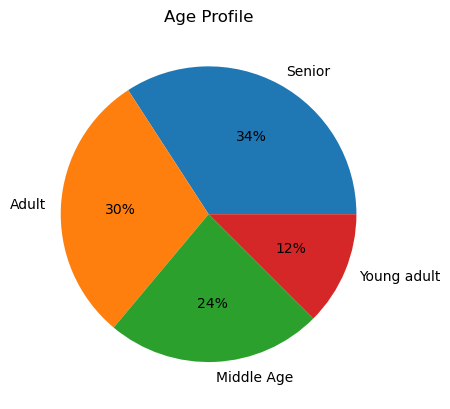

In [10]:
# Create a pie chart for 'age_flag'

pie_chart_age = df_high_activity_cust['age_flag'].value_counts().plot.pie(title = 'Age Profile', label = '', autopct = ('%1.f%%'))

In [11]:
# Export pie_chart_age

pie_chart_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_age_cust'))

### Find aggregate variables

In [12]:
age_agg = df_high_activity_cust.groupby('age_flag').agg({'days_since_last_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [13]:
age_agg

days_since_last_order                  prices                  \
                              min   max       mean    min   max      mean   
age_flag                                                                    
Adult                         0.0  30.0  10.815262    1.0  25.0  7.789119   
Middle Age                    0.0  30.0  10.823913    1.0  25.0  7.788375   
Senior                        0.0  30.0  10.800665    1.0  25.0  7.795410   
Young adult                   0.0  30.0  10.799071    1.0  25.0  7.784857   

                           
                      sum  
age_flag                   
Adult        7.177246e+07  
Middle Age   5.694152e+07  
Senior       8.243260e+07  
Young adult  3.008472e+07

### Compare age profile with region

In [14]:
# Create crosstab between age and region

crosstab_age_region = pd.crosstab(df_high_activity_cust['region'], df_high_activity_cust['age_flag'], dropna = False)

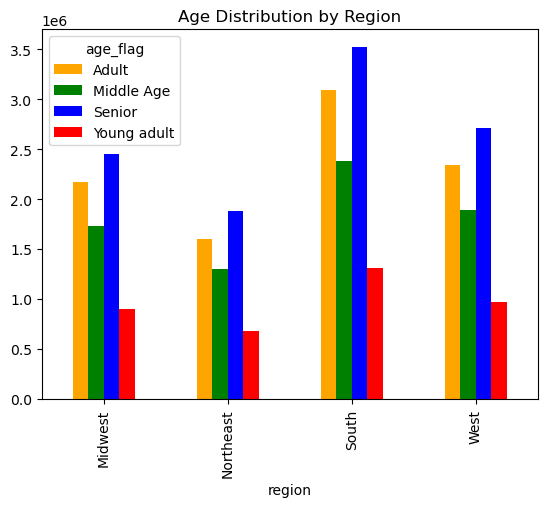

In [15]:
# Create a bar chart

bar_age_region = crosstab_age_region.plot.bar(title = 'Age Distribution by Region', color = {'Young adult': 'red', 'Adult': 'orange', 'Middle Age': 'green', 'Senior': 'blue'})

In [16]:
# Export bar_age_region

bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile_region'))

### Compare age profile with departments

In [17]:
# Import departments_wrangled.csv

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [18]:
# Check output

df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [19]:
# Rename 'Unnamed: 0' column as 'department_id'

df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [20]:
# Check output

df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [21]:
# Merge df_dep with df_high_activity_cust

df_merged = df_high_activity_cust.merge(df_dep, on = 'department_id')

In [22]:
# Check output

df_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,State,Age,date_joined,n_dependants,fam_status,income,region,customer_activity,age_flag,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages


In [23]:
# Create crosstab between age and departments

crosstab_age_departments = pd.crosstab(df_merged['department'], df_merged['age_flag'], dropna = False)

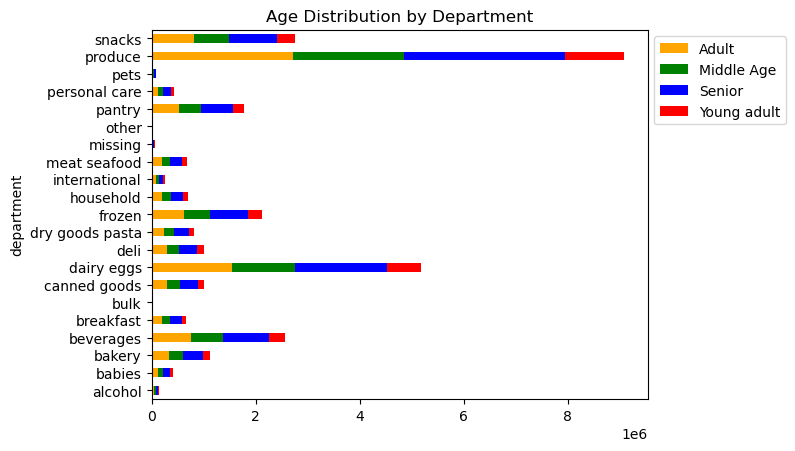

In [24]:
# Create a stacked bar chart

stacked_bar_age_department = crosstab_age_departments.plot.barh(stacked = True, title = 'Age Distribution by Department', color = {'Young adult': 'red', 'Adult': 'orange', 'Middle Age': 'green', 'Senior': 'blue'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

Produce, Dairy/Eggs, Snacks, and Beverages are the most popular departments across all ages

In [25]:
# Export stacked bar chart

stacked_bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_age_department'))

## Profiling based on income

In [26]:
# Create income_flag

df_merged.loc[df_merged['income'] <= 50000, 'income_flag'] = 'Low income'
df_merged.loc[(df_merged['income'] >50000) & (df_merged['income'] <= 150000), 'income_flag'] = 'Middle income'
df_merged.loc[df_merged['income'] > 150000, 'income_flag'] = 'High income'

In [27]:
# Check value counts

df_merged['income_flag'].value_counts(dropna = False)

Middle income    23707476
High income       3894534
Low income        3362554
Name: income_flag, dtype: int64

In [28]:
# Check output

df_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,Age,date_joined,n_dependants,fam_status,income,region,customer_activity,age_flag,department,income_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income
2,473747,1,prior,3,3,12,21.0,196,1,1,...,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income
4,431534,1,prior,5,4,15,28.0,196,1,1,...,31,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income


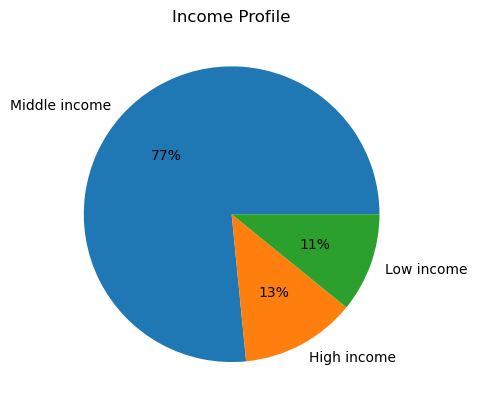

In [29]:
# Create a pie chart for 'income_flag'

pie_chart_income = df_merged['income_flag'].value_counts().plot.pie(title = 'Income Profile', label = '', autopct = ('%1.f%%'))

In [30]:
# Export pie chart

pie_chart_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_income_profile'))

### Find aggregate variables

In [31]:
income_agg = df_merged.groupby('income_flag').agg({'days_since_last_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [32]:
income_agg

days_since_last_order                  prices                  \
                                min   max       mean    min   max      mean   
income_flag                                                                   
High income                     0.0  30.0  10.684293    1.0  25.0  7.940521   
Low income                      0.0  30.0  11.175808    1.0  25.0  6.707347   
Middle income                   0.0  30.0  10.779429    1.0  25.0  7.919563   

                             
                        sum  
income_flag                  
High income    3.092463e+07  
Low income     2.255382e+07  
Middle income  1.877528e+08

Low income customers have the lowest mean price for orders and a longer duration before placing their next order. Middle income customers generate the majority of sales.

### Compare income profile with region

In [33]:
# Create crosstab between income and region

crosstab_income_region = pd.crosstab(df_merged['region'], df_merged['income_flag'], dropna = False)

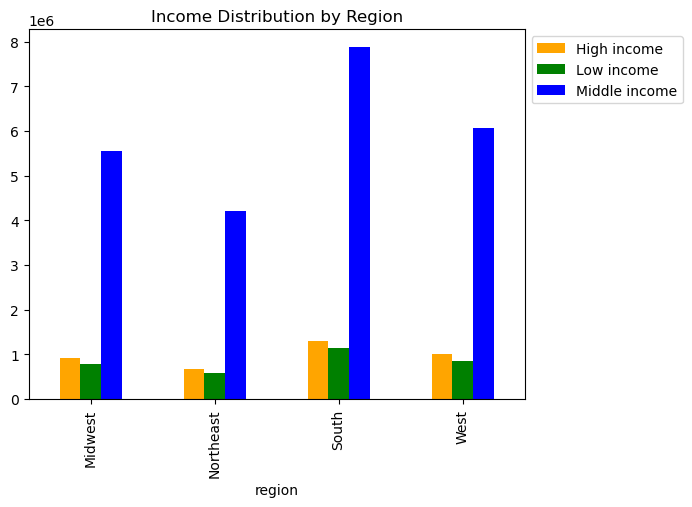

In [34]:
# Create a bar chart

bar_income_region = crosstab_income_region.plot.bar(title = 'Income Distribution by Region', color = {'Low income': 'green', 'Middle income': 'blue', 'High income': 'orange'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [35]:
# Export bar graph

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region'))

### Compare income profile with departments

In [36]:
# Create crosstab between income and departments

crosstab_income_departments = pd.crosstab(df_merged['department'], df_merged['income_flag'], dropna = False)

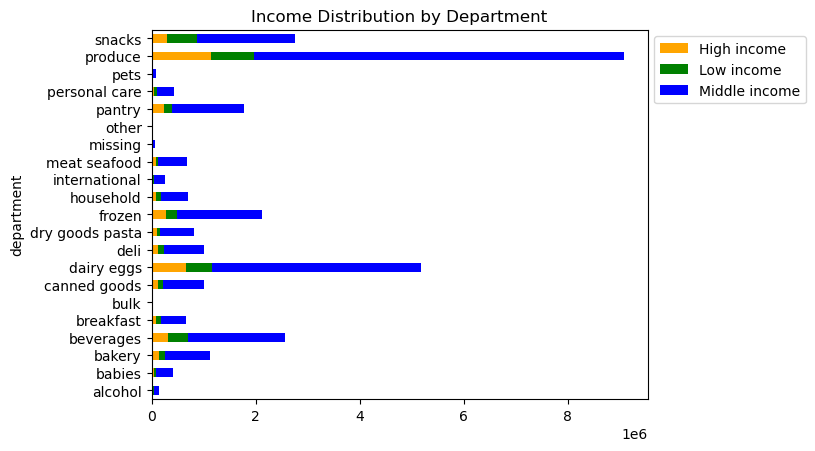

In [37]:

# Create a stacked bar chart

stacked_bar_income_department = crosstab_income_departments.plot.barh(stacked = True, title = 'Income Distribution by Department', color = {'Low income': 'green', 'Middle income': 'blue', 'High income': 'orange'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()


High income customers buy more dairy and produce than low income customers, while low income customers buy more snacks than high income customers.

In [38]:
# Export stacked bar chart

stacked_bar_income_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_income_department'))

### Profiling based on number of dependants

In [39]:
# Create role_flag

df_merged.loc[df_merged['n_dependants'] == 0, 'role_flag'] = 'Individual'
df_merged.loc[df_merged['n_dependants'] != 0, 'role_flag'] = 'Caregiver'

In [40]:
# Check value counts

df_merged['role_flag'].value_counts(dropna = False)

Caregiver     23224883
Individual     7739681
Name: role_flag, dtype: int64

In [41]:
# Check output

df_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,date_joined,n_dependants,fam_status,income,region,customer_activity,age_flag,department,income_flag,role_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income,Caregiver
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income,Caregiver
2,473747,1,prior,3,3,12,21.0,196,1,1,...,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income,Caregiver
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income,Caregiver
4,431534,1,prior,5,4,15,28.0,196,1,1,...,2/17/2019,3,married,40423,South,High-activity,Adult,beverages,Low income,Caregiver


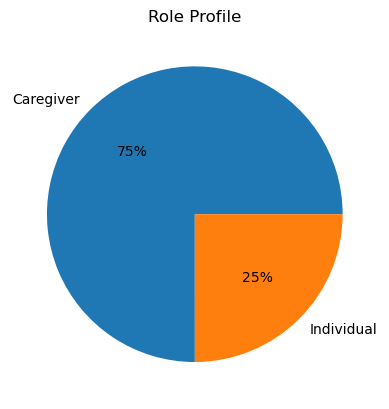

In [42]:
# Create a pie chart for 'role_flag'

pie_chart_role = df_merged['role_flag'].value_counts().plot.pie(title = 'Role Profile', label = '', autopct = ('%1.f%%'))

In [43]:
# Export pie chart

pie_chart_role.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_role_profile'))

### Find aggregate variables

In [44]:
role_agg = df_merged.groupby('role_flag').agg({'days_since_last_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [45]:


role_agg

days_since_last_order                  prices                  \
                             min   max       mean    min   max      mean   
role_flag                                                                  
Caregiver                    0.0  30.0  10.816416    1.0  25.0  7.790903   
Individual                   0.0  30.0  10.791951    1.0  25.0  7.789531   

                          
                     sum  
role_flag                 
Caregiver   1.809428e+08  
Individual  6.028849e+07

Caregiver customers generate the majority of sales.

### Compare role profile with region

In [46]:
# Create crosstab between role and region

crosstab_role_region = pd.crosstab(df_merged['region'], df_merged['role_flag'], dropna = False)

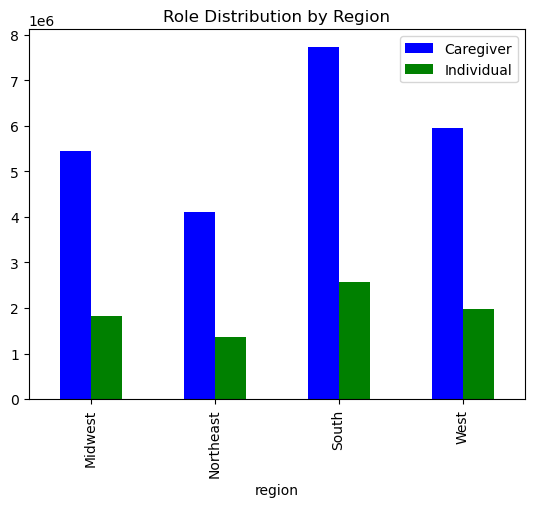

In [47]:
# Create a bar chart

bar_role_region = crosstab_role_region.plot.bar(title = 'Role Distribution by Region', color = {'Caregiver': 'blue', 'Individual': 'green'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

The South region has the most customers

In [48]:
# Export bar graph

bar_role_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_role_region'))

### Compare role profile with departments

In [49]:
# Create crosstab between role and departments

crosstab_role_departments = pd.crosstab(df_merged['department'], df_merged['role_flag'], dropna = False)

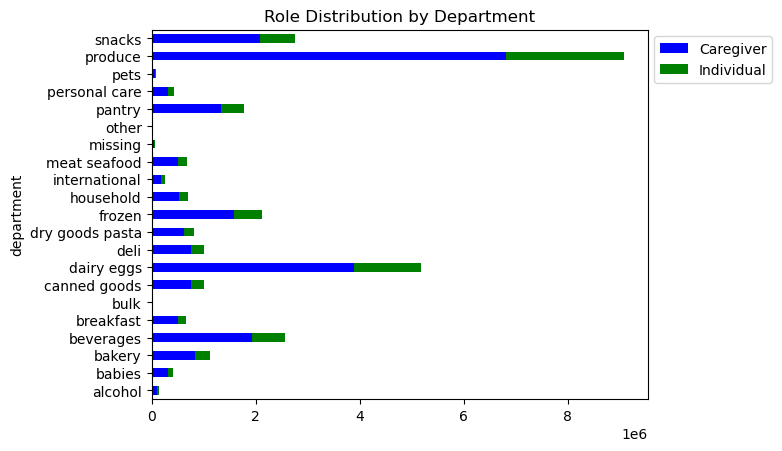

In [50]:
# Create a stacked bar chart

stacked_bar_role_department = crosstab_role_departments.plot.barh(stacked = True, title = 'Role Distribution by Department', color = {'Caregiver': 'blue', 'Individual': 'green'})
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

In [51]:
# Export stacked bar chart

stacked_bar_role_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_bar_role_department'))

## Export df_merged

In [52]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 30964563
Data columns (total 38 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                int64   
 2   eval_set               object  
 3   order_number           int64   
 4   orders_day_of_week     int64   
 5   order_hour_of_day      int64   
 6   days_since_last_order  float64 
 7   product_id             int64   
 8   add_to_cart_order      int64   
 9   reordered              int64   
 10  Unnamed: 0_y           int64   
 11  product_name           object  
 12  aisle_id               int64   
 13  department_id          int64   
 14  prices                 float64 
 15  _merge                 category
 16  busiest_day            object  
 17  busiest_days           object  
 18  busiest_period_of_day  object  
 19  max_order              int64   
 20  loyalty_flag           object  
 21  average_price          float6

In [60]:
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_final.pkl'))